In [1]:
# Anatole Moureaux
# 29 Feb 2020

from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import *
from pymatgen.io.cif import *
from pymatgen.core.operations import *
from tabulate import tabulate
from pymatgen.symmetry.site_symmetries import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
#mission 4
print("Téléchargement du fichier CIF...")
structure = MPRester("H45GsyS7rpfkZzFI").get_structure_by_material_id("mp-9361")
CifWriter(structure,0.1, write_magmoms=False).write_file("RbLaS2_mp-9361_symmetrized.cif")
print("Téléchargement terminé !")

Téléchargement du fichier CIF...
Téléchargement terminé !


In [3]:
#mission 6
#liste des éléments de symétrie
customSym1 = SymmOp.from_xyz_string('-x, -y, -z')#2
customSym2 = SymmOp.from_xyz_string('y, x, -z')#7
customSym3 = SymmOp.from_xyz_string('x, x-y, z')#12

In [4]:
#3 différents atomes : 
Rb0 = [0.0,0.0,0.0]
La1 = [0.0,0.0,0.5]
S2 = [0.0,0.0,0.23]

In [5]:
#application des opérations
Rb0res = customSym1.operate(Rb0)
La1res = customSym2.operate(La1)
S2res = customSym3.operate(S2)

In [6]:
#affichage des résultats
print("\n")
print(tabulate([
	["("+str(customSym1.as_xyz_string()+")"),str(Rb0),str(Rb0res)],
	["----------------------------------","",""],
	[customSym1,"",""],
	["----------------------------------","-----------------","----------------------------------"],
	["("+str(customSym2.as_xyz_string()+")"),str(La1),str(La1res)],
	["----------------------------------","",""],	
	[customSym2,"",""],
	["----------------------------------","-----------------","----------------------------------"],
	["("+str(customSym3.as_xyz_string()+")"),str(S2),str(S2res)],
	["----------------------------------","",""],	
	[customSym3,"",""],
	["----------------------------------","-----------------","----------------------------------"]],
	headers=["Opération de symétrie","Atome de départ","Atome d'arrivée"]))



Opération de symétrie               Atome de départ    Atome d'arrivée
----------------------------------  -----------------  ----------------------------------
(-x, -y, -z)                        [0.0, 0.0, 0.0]    [0. 0. 0.]
----------------------------------
Rot:
[[-1.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]
----------------------------------  -----------------  ----------------------------------
(y, x, -z)                          [0.0, 0.0, 0.5]    [ 0.   0.  -0.5]
----------------------------------
Rot:
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]
----------------------------------  -----------------  ----------------------------------
(x, x-y, z)                         [0.0, 0.0, 0.23]   [0.   0.   0.23]
----------------------------------
Rot:
[[ 1.  0.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]
----------------------------------  -----------------  ----------------------------------


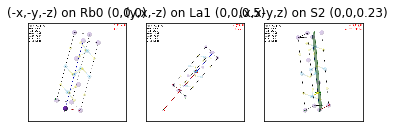

In [7]:
img1=mpimg.imread('op1.png')
img2=mpimg.imread('op2.png')
img3=mpimg.imread('op3.png')

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
ax1.imshow(img1)
ax1.set_title("(-x,-y,-z) on Rb0 (0,0,0)")
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax2.imshow(img2)
ax2.set_title("(y,x,-z) on La1 (0,0,0.5)")
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax3.imshow(img3)
ax3.set_title("(x,x-y,z) on S2 (0,0,0.23)")
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)

plt.show()